In [1]:
import numpy as np

import time
import sys

from matplotlib import pyplot as plt

In [2]:
# Run the Fourier streaming model!
from velocileptors.LPT.fourier_streaming_model_fftw import FourierStreamingModel

# we scale the z = 0 power spectrum given to give z = 0.8 results
z, D, f = 0.8, 0.6819, 0.8076
k, p = np.loadtxt('pk.dat').T

t1 = time.time()
fsm = FourierStreamingModel(k, D**2 * p, one_loop= True, import_wisdom=True, wisdom_file='./wisdom.npy',\
                        kmin = 1e-2, kmax = 0.5, nk = 100,
                        cutoff=10, extrap_min = -4, extrap_max = 3, N = 2000, threads=1, jn=5, shear=True)
t2 = time.time()
print(t2-t1)

2.8721251487731934


In [3]:
# Let's proceed straight to the power spectrum with the bias vector
bvec = [0.70, -1.3, -0.06, 0, 7.4, -17., 8.9, 3.1, 1.9e3, -4.2e3, -670]

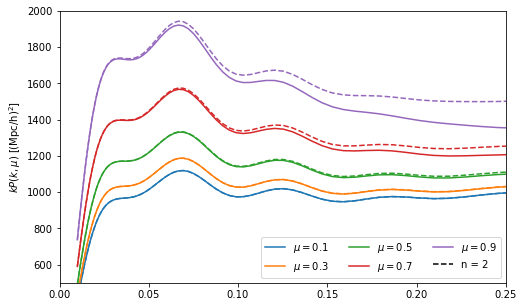

In [4]:
plt.figure(figsize=(8,5))

mus = [0.1, 0.3, 0.5, 0.7, 0.9]


for ii, mu in enumerate(mus):
    
    # The c3 parameter is the counterterm ansatz to the third moment
    # Note that c3 enters as c3 / 6 * k^2 mu^4 P(k)
    kw, pw = fsm.compute_redshift_space_power_at_mu(bvec,f,mu,counterterm_c3=-120)
    plt.plot(kw, kw*pw,'C'+str(ii)+'-',label=r'$\mu = %.1f$'%(mu))
    
    kw, pw = fsm.compute_redshift_space_power_at_mu(bvec,f,mu,counterterm_c3=0)
    plt.plot(kw, kw*pw,'C'+str(ii)+'--')

plt.plot(kw, -1000*kw, 'k--', label='n = 2')    
    
plt.ylabel(r'$k P(k,\mu)$ [(Mpc/h)$^2$]')


plt.xlim(0,0.25)
plt.ylim(500,2000)

plt.legend(ncol=3,loc='lower right')

plt.show()

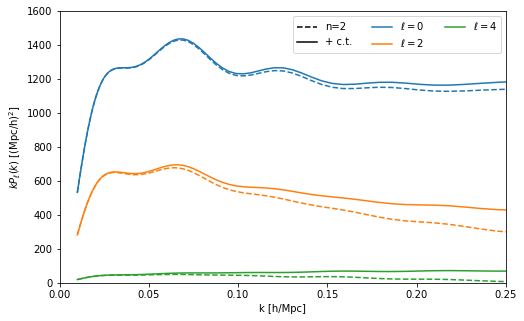

In [5]:
# ... and multipoles
plt.figure(figsize=(8,5))

ks, p0g, p2g, p4g = fsm.compute_redshift_space_power_multipoles(bvec,f,counterterm_c3=-120)
ks, p0, p2, p4 = fsm.compute_redshift_space_power_multipoles(bvec,f,counterterm_c3=0)

plt.plot(ks, -1000*ks,'k--',label='n=2')
plt.plot(ks, -1000*ks,'k-',label='+ c.t.')


plt.plot(ks, ks*p0,'C0-',label=r'$\ell = 0$')
plt.plot(ks, ks*p0g,'C0--')

plt.plot(ks, ks*p2,'C1-',label=r'$\ell = 2$')
plt.plot(ks, ks*p2g,'C1--')

plt.plot(ks, ks*p4,'C2-',label=r'$\ell = 4$')
plt.plot(ks, ks*p4g,'C2--')

plt.xlabel('k [h/Mpc]')
plt.ylabel(r'$k P_\ell(k)$ [(Mpc/h)$^2$]')

plt.xlim(0,0.25)
plt.ylim(0,1600)

plt.legend(ncol=3,loc='upper right')

plt.show()